# Demonstration

Demonstration of capabilities of package


## xr Dataset




First we will demonstrate how to create the xarray Dataset object.

In [ ]:
import xarray as xr
import duckdb as db
from pathlib import Path
from database_etl import get_data, definitions, etl_pipeline_raw

with db.connect() as conn:
    etl_pipeline_raw(
        run_extraction=False,
        data_dir=definitions.RAW_DATA_LIB,
        dirty_st_path=Path(definitions.DIRTY_ST_PATH),
        ct_pw=definitions.CT_PW,
        ct_un=definitions.CT_UN,
        con=conn,
        excluded_samples=definitions.EXCLUDED_RAW_SAMPLES,
    )
    ds = get_data(
        output="xr",
        con=conn,
    )
    del conn
ds


<xarray.Dataset> Size: 576MB
Dimensions:      (id: 87, wavelength: 106, mins: 7800)
Coordinates: (12/20)
  * id           (id) <U36 13kB 'f4f1ff8c-05f2-42ab-a3ab-3d1a34585098' ... 'a...
    acq_date     (id) datetime64[ns] 696B 2023-03-15T04:47:25 ... 2023-02-16T...
    acq_method   (id) <U32 11kB 'avantor100x4_6c18-h2o-meoh-2_5.m' ... 'avant...
    seq_name     (id) <U43 15kB '2023-03-14_wines_2023-03-14_19-49-27' ... '2...
    description  (id) object 696B None None None None ... None None None None
    detection    (id) <U3 1kB 'raw' 'raw' 'raw' 'raw' ... 'raw' 'raw' 'raw'
    ...           ...
    type         (id) <U21 7kB 'red' 'red' 'white' ... 'red' 'white - sparkling'
    color        (id) <U6 2kB 'red' 'red' 'white' ... 'red' 'red' 'white'
    category     (id) <U13 5kB 'dry' 'dry' 'dry' ... 'dry' 'dry' 'sparkling'
    varietal     (id) <U21 7kB 'nebbiolo' 'nebbiolo' ... 'shiraz' 'chardonnay'
  * wavelength   (wavelength) <U3 1kB '190' '192' '194' ... '396' '398' '400'
  * mins         (mins) float64 62kB 0.0 0.006667 0.01333 ... 51.98 51.99 51.99
Data variables:
    imgs         (id, mins, wavelength) float64 575MB -1.881 -1.344 ... -0.1327

Next we will show how to plot a subset, in this case all samples where varietal is shiraz at the 256 nm wavelength 


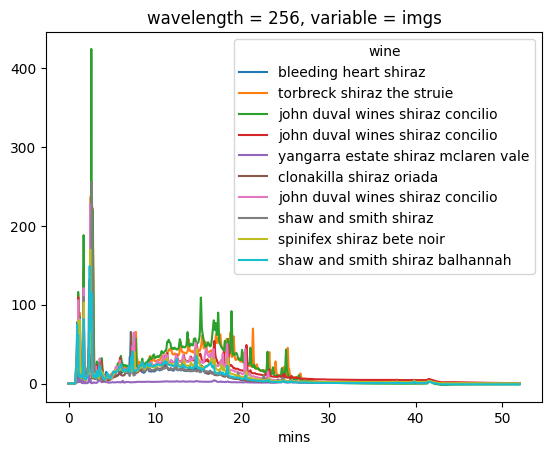

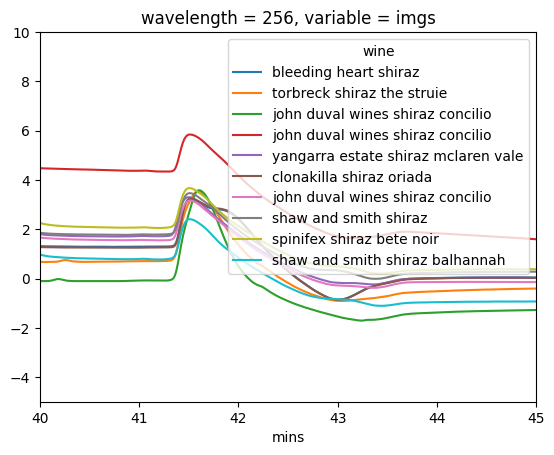

In [ ]:
import matplotlib.pyplot as plt

ds.sel(id=ds.varietal == "shiraz", wavelength="256").to_array().squeeze().plot.line(
    x="mins",
    hue="wine",
)

plt.show()
ds.sel(id=ds.varietal == "shiraz", wavelength="256").to_array().squeeze().plot.line(
    x="mins", hue="wine", xlim=(40, 45), ylim=(-5, 10)
)
plt.show()
